In [1]:
from scipy.stats import bernoulli
from random import random
import matplotlib.pyplot as plt
from scipy.special import factorial,binom
import numpy as np

## Exercice 1

#1  
k ou k+1

In [2]:
#2
#loi de bernoulli
def bernoulli(prob):
    if random() >= prob:
        return 1
    else:
        return 0

In [7]:
prob = 0.5
print(bernoulli(prob))

1


In [8]:
#3
#planche de Galton
def simul_planche(N,p):
    place = 0
    for i in range(N):
        place += bernoulli(p)
    return place 

In [6]:
N=12
p=0.5
print(simul_planche(N,p))

3


In [51]:
#4
place = []
for i in range(10000):
    place.append(simul_planche(12,0.5))
#print(place)

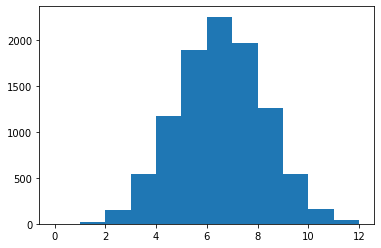

In [52]:
#5
plt.hist(place, range=(0,12),bins=12)
plt.show()

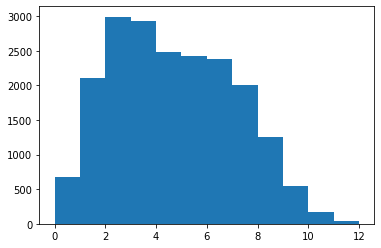

In [53]:
#6
for i in range(10000):
    place.append(simul_planche(12,0.8))
plt.hist(place, range=(0,12),bins=12)
plt.show()

## Exercice 2

#1  
binomial car décrit un nombre de succès dans une série d'experience identiques et indépendantes

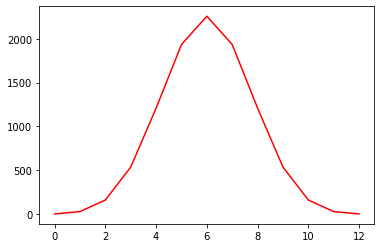

In [54]:
#2 
p=0.5
N= 10000
#P(X=k) = (k parmis n)*p**(k) *(1-p)**n-k 
k = np.array(range(12+1))  #[0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(k, binom(12, k)*p**(k)*(1-p)**(12-k)*N, 'r')
plt.show()


## Exercice 3

#1  
Les billes iraient beaucoup plus d'un coté que de l'autre

#2  
Poisson  
E[X] = V[X] = λ

#3  
La loi qui l'approche au mieux est la loi poisson car on connait le nombre moyen de rebond vers la gauche et donc la position moyenne d'une bille.  
Si X est une variable aléatoire suivant la loi binomiale B(n,p) avec n≥30, p≤0,1 et np≤15, on peut approximer la loi de X par la loi de Poisson de paramètre np

In [60]:
def histogramme_et_poisson(N, p, nombre_de_billes):
    # Simuler positions arrivée des billes
    positions_arrivee = np.random.binomial(N, p, nombre_de_billes)

    hist_empirique, bins = np.histogram(positions_arrivee, bins=range(N+2))
    plt.bar(bins[:-1], hist_empirique, width=1, align='center')

    # Calculer la loi de Poisson avec λ = N * p
    lambda_poisson = N * p
    poisson_vals = poisson.pmf(range(N+1), lambda_poisson)

    plt.plot(range(N+1), poisson_vals * nombre_de_billes, 'ro-', label='Loi de Poisson')
    plt.xlabel('Position d\'arrivée')
    plt.ylabel('Fréquence')
    plt.legend()

    plt.show()

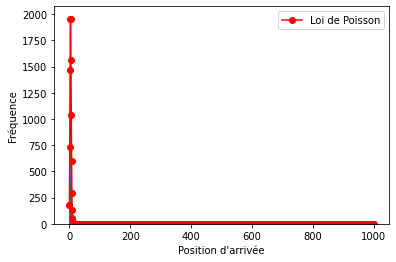

In [61]:
histogramme_et_poisson(1000, 0.004, 10000)

## Exercice 4

#1  
avec 1 - p = 0,5  
m = N * (p - q)  
m = 1000 * (0,5 - 0,5) = 1000 * 0 = 0  
V = N * p * q  
V = 1000 * 0,5 * 0,5 = 1000 * 0,25 = 250  

#2  
Yi = 1 si la bille va à gauche à l étape i  
Yi = 0 si la bille va à droite à l étape i 
La loi de probabilité de chaque Yi est donc une loi de Bernoulli, car il n y a que deux résultats possibles (1 ou 0) et chaque étape est indépendante donc on peut ecrire X sous la forme d'une somme de Yi tel que X = Y1 + Y2 + ... + YN


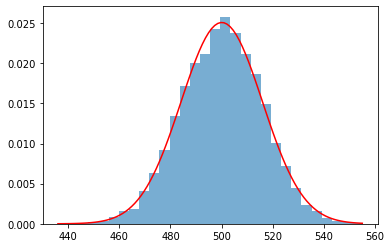

In [65]:
#3
from scipy.stats import norm

N = 10000
p = 0.5
N_rangées = 1000
X = np.random.binomial(N_rangées, p, N)

moy = np.mean(X)
var= np.var(X)

distrib_normale = norm(loc=moy, scale=np.sqrt(var))

plt.hist(X, bins=30, density=True, alpha=0.6)

x = np.linspace(min(X), max(X), 100)
plt.plot(x, distrib_normale.pdf(x), 'r', label='Distribution Normale')

plt.show()
